In [1]:
import sys
sys.path.append("../")
import pandas as pd
import numpy as np
import os
from Utils import *
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as dat

import seaborn as sns

sns.set_style('darkgrid')
sns.set(font_scale=1.4) # for label size

from Behavior_Drift import *

window_size = 14
labels = ['sleep']
methods = ["features", "stat_test", "histogram_intersect"]
behavior_type = Behavior.Behavior.OCC_TIME

In [2]:
results = pd.read_csv('../output/real_life_results.csv')


# results.columns
# results.sort_values(['dataset','silhouette'], ascending=False)

results.sort_values(['dataset', 'silhouette'], ascending=False)

,dataset,window_size,latent_dim,nb_cluster,silhouette,mse_loss,mae_acc
33,hh117,30,5,5,0.725825,0.002516,0.002516
28,hh117,7,10,2,0.695281,0.008941,0.008941
29,hh117,7,20,2,0.687438,0.008957,0.008957
27,hh117,7,5,2,0.684542,0.008957,0.008957
35,hh117,30,20,4,0.682654,0.006985,0.006985
34,hh117,30,10,4,0.678173,0.006966,0.006966
31,hh117,14,10,3,0.665211,0.007884,0.007884
30,hh117,14,5,3,0.652575,0.007856,0.007856
32,hh117,14,20,2,0.650984,0.007879,0.007879
26,hh115,30,20,3,0.780756,0.003529,0.003529


C:\Users\cyriac.azefack\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1333: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


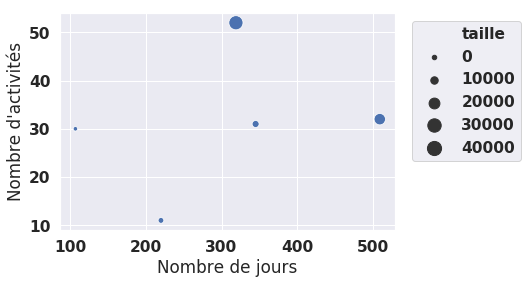

In [3]:
# Add dataset details
dataset_details = pd.read_csv('../input/dataset_details.csv')
dataset_details['dataset'] = dataset_details.dataset.apply(lambda x:x.lower())

dataset_details.columns = ['dataset', 'nb_days','taille', 'nb_activities']

sns.scatterplot(data=dataset_details, x="nb_days", y="nb_activities", size='taille', sizes=(20, 200))
plt.xlabel('Nombre de jours')
plt.ylabel('Nombre d\'activités')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))


['dataset', 'window_size', 'latent_dim', 'nb_cluster', 'silhouette', 'mse_loss', 'mae_acc', 'nb_days', 'taille', 'nb_activities']


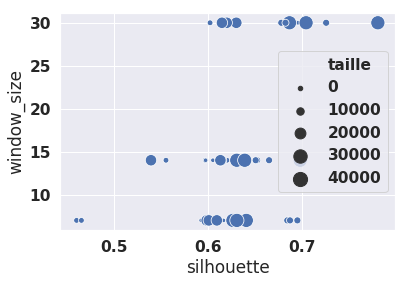

In [4]:
#results = results.join(dataset_details, on='dataset')

final_results = pd.merge(results, dataset_details, on=['dataset', 'dataset'])

print(list(final_results.columns))

# final_results.sort_values(by=['silhouette'], axis=1, inplace=True)

# final_results.dtypes
# 
sns.scatterplot(data=final_results, x="silhouette", y="window_size", size='taille', sizes=(20, 200))

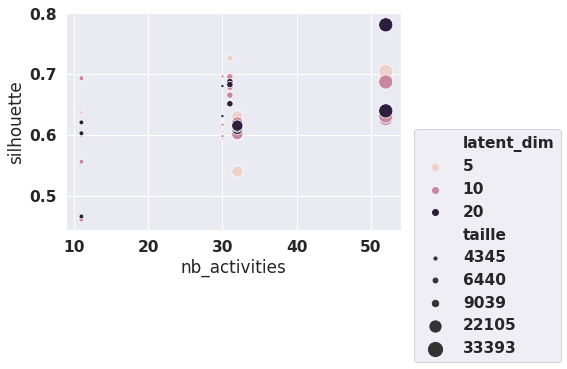

In [5]:
sns.scatterplot(x="nb_activities", y="silhouette",  hue="latent_dim", legend='full',
                size="taille", sizes=(10, 200), data=final_results)
plt.legend(loc='best', bbox_to_anchor=(1, 0., 0.5, 0.5))

C:\Users\cyriac.azefack\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1333: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


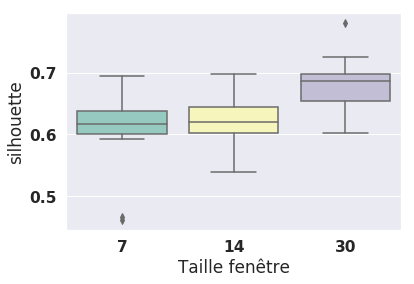

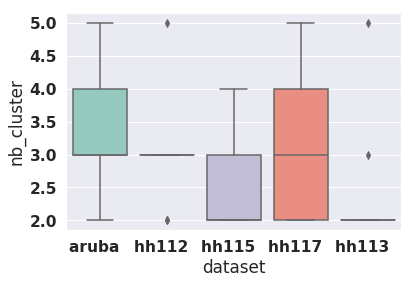

In [6]:
# Training Loss Value
sns.boxplot(x="window_size", y="silhouette", data=final_results, palette="Set3")
plt.xlabel("Taille fenêtre")
# plt.ylabel('loss')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
plt.figure()
sns.boxplot(x="dataset", y="nb_cluster", data=final_results, palette="Set3")

Text(0,0.5,'Nb clusters')

C:\Users\cyriac.azefack\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1333: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


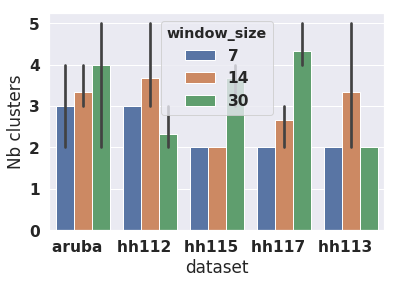

In [11]:
sns.barplot(x="dataset", y="nb_cluster", hue="window_size", data=final_results)
# plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.ylabel('Nb clusters')

C:\Users\cyriac.azefack\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cyriac.azefack\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\cyriac.azefack\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1333: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,28.8,'Dataset')

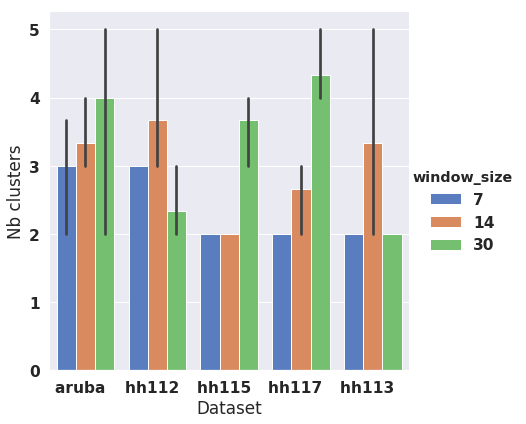

In [15]:
sns.factorplot("dataset", "nb_cluster", "window_size",
                    data=final_results, kind="bar",
                    size=6, palette="muted",
                   legend_out=True)
plt.ylabel('Nb clusters')
plt.xlabel('Dataset')

In [9]:
dataset_details = pd.read_csv('../input/dataset_details.csv')
dataset_details

,dataset,nb_days,nb_events,nb_activities
0,ARUBA,220,6440,11
1,HH112,107,4345,30
2,HH113,509,22105,32
3,HH115,319,33393,52
4,HH117,345,9039,31
